In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#store the database path
database_path = "../Resources/hawaii.sqlite"

In [5]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#debug statement to check if measurement is working properly
for row in session.query(Measurement, Measurement.date).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x00000134060BDD90>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x00000134060BDCD0>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x00000134060BDC40>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x00000134060BD9A0>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x00000134060BD940>, '2010-01-06')


In [11]:
#debug statement to check if station is working properly
for row in session.query(Station, Station.name).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x00000134060E2A30>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x00000134060E2B20>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.station object at 0x00000134060E2B80>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.station object at 0x00000134060E2BE0>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.station object at 0x00000134060E2C40>, 'UPPER WAHIAWA 874.3, HI US')


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set (method 1).
dates_list = []
for row in session.query(Measurement.date).all():
    dates_list.append(row)

dates_df = pd.DataFrame(dates_list)
dates_df.sort_values
print(dates_df.max())

date    2017-08-23
dtype: object


In [13]:
# Find the most recent date in the data set (better method).
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
cutoff_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > cutoff_date).all()
prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp)
prcp_df



# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


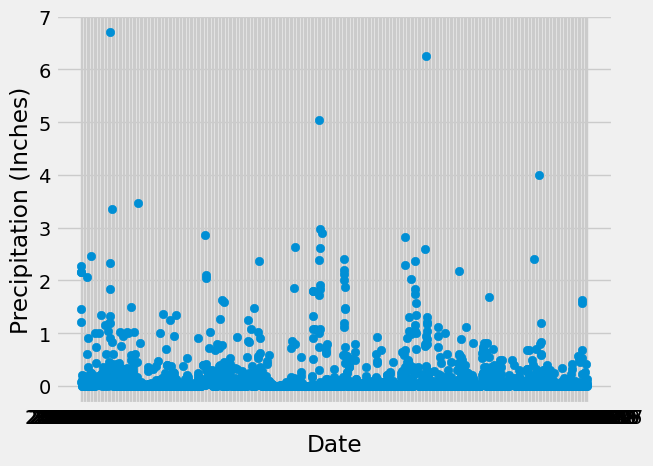

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data (scatter plot)
x_values = prcp_df['date']
y_values = prcp_df['prcp']
plt.scatter(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
#(method 1)
prcp_mean = prcp_df['prcp'].mean()
prcp_std_dev = prcp_df['prcp'].std()
prcp_min = prcp_df['prcp'].min()
prcp_max = prcp_df['prcp'].max()
prcp_median = prcp_df['prcp'].median()


quartiles = prcp_df['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Mean: {prcp_mean}")
print(f"Std.: {prcp_std_dev}")
print(f"Min: {prcp_min}")
print(f"25%: {lowerq}")
print(f"50%: {prcp_median}")
print(f"50%: {quartiles[0.5]} (calculated a 2nd way)")
print(f"75%: {upperq}")
print(f"Max: {prcp_max}")
print(f"IQR: {iqr}")


Mean: 0.1764615384615388
Std.: 0.46028836368132586
Min: 0.0
25%: 0.0
50%: 0.02
50%: 0.02 (calculated a 2nd way)
75%: 0.13
Max: 6.7
IQR: 0.13


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
#(method 2)
prcp_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Measurement.station).count()
num_stations

19550

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temps_df = pd.DataFrame(most_active_station_temps)
min_temp = temps_df.min()
max_temp = temps_df.max()
avg_temp = temps_df.mean()
print(f"Station USC00519281 min temp: {min_temp}")
print(f"Station USC00519281 max temp: {max_temp}")
print(f"Station USC00519281 avg temp: {avg_temp}")
      

Station USC00519281 min temp: tobs    54.0
dtype: float64
Station USC00519281 max temp: tobs    85.0
dtype: float64
Station USC00519281 avg temp: tobs    71.663781
dtype: float64


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
cutoff_date_12month = '2016-08-23'
last_12_months_temps = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > cutoff_date_12month)).all()
last_12_months_temps_df = pd.DataFrame(last_12_months_temps)
last_12_months_temps_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


<AxesSubplot:ylabel='Frequency'>

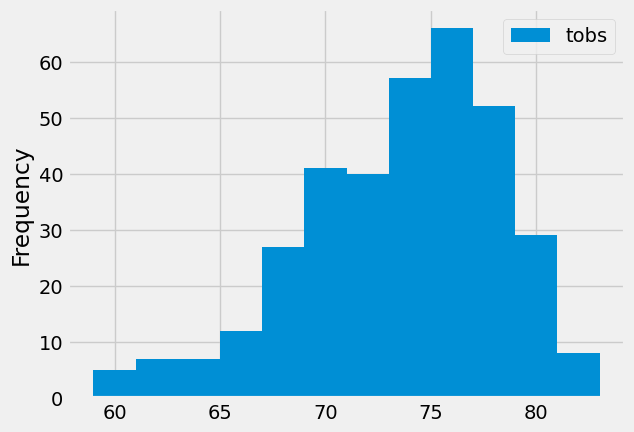

In [22]:
# plot the results as a histogram
last_12_months_temps_df.plot.hist(bins=12)

# Close session

In [ ]:
# Close Session
session.close()

In [23]:
#SCRATCH WORK FOR PART 2
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > cutoff_date).all()
precip_data = []
for date, prcp in results:
    precip_dict = {}
    precip_dict["date"] = date
    precip_dict["prcp"] = prcp
    precip_data.append(precip_dict)
precip_data

[{'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': None},
 {'date': '2016-09-06', 'prcp': None},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05},
 {'date': '2016-09-18', 'prcp': 0.0

In [24]:
#SCRATCH WORK FOR PART 2
#station_list query
results = session.query(Measurement.station).distinct().all()
#create a dictionary of the active stations and their counts
station_data = []
for station in results:
    station_dict = {}
    station_dict["station name"] = station[0]
    station_data.append(station_dict)
station_data

[{'station name': 'USC00519397'},
 {'station name': 'USC00513117'},
 {'station name': 'USC00514830'},
 {'station name': 'USC00517948'},
 {'station name': 'USC00518838'},
 {'station name': 'USC00519523'},
 {'station name': 'USC00519281'},
 {'station name': 'USC00511918'},
 {'station name': 'USC00516128'}]

In [25]:
cutoff_date_12month = '2016-08-23'
results = session.query(Measurement.date, Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > cutoff_date_12month)).all()


    #create a dictionary of t_obs data for the most active station
tobs_data = []
for date, tobs in results:
    tobs_dict = {}
    tobs_dict["Date"] = date
    tobs_dict["Oberved Temperature"] = tobs
    tobs_data.append(tobs_dict)
tobs_data

[{'Date': '2016-08-24', 'Oberved Temperature': 77.0},
 {'Date': '2016-08-25', 'Oberved Temperature': 80.0},
 {'Date': '2016-08-26', 'Oberved Temperature': 80.0},
 {'Date': '2016-08-27', 'Oberved Temperature': 75.0},
 {'Date': '2016-08-28', 'Oberved Temperature': 73.0},
 {'Date': '2016-08-29', 'Oberved Temperature': 78.0},
 {'Date': '2016-08-30', 'Oberved Temperature': 77.0},
 {'Date': '2016-08-31', 'Oberved Temperature': 78.0},
 {'Date': '2016-09-01', 'Oberved Temperature': 80.0},
 {'Date': '2016-09-02', 'Oberved Temperature': 80.0},
 {'Date': '2016-09-03', 'Oberved Temperature': 78.0},
 {'Date': '2016-09-04', 'Oberved Temperature': 78.0},
 {'Date': '2016-09-05', 'Oberved Temperature': 78.0},
 {'Date': '2016-09-06', 'Oberved Temperature': 73.0},
 {'Date': '2016-09-07', 'Oberved Temperature': 74.0},
 {'Date': '2016-09-08', 'Oberved Temperature': 80.0},
 {'Date': '2016-09-09', 'Oberved Temperature': 79.0},
 {'Date': '2016-09-10', 'Oberved Temperature': 77.0},
 {'Date': '2016-09-11', 'Obe

In [26]:
#SCRATCH WORK FOR PART 2
#start date query
session.query(func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).all()

[(73.09795396419437, 53.0, 87.0)]

In [27]:
start_date = '2016-09-13'
results = session.query(func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).all()

temp_data = []
for tobs in results:
    temp_dict = {}
    temp_dict["Average"] = func.avg(Measurement.tobs)
    temp_dict["Minimum"] = func.min(Measurement.tobs)
    temp_dict["Maximum"] = func.max(Measurement.tobs)
    temp_data.append(temp_dict)
temp_data

[{'Average': <sqlalchemy.sql.functions.Function at 0x1340749dbb0; avg>,
  'Minimum': <sqlalchemy.sql.functions.min at 0x1340749d490; min>,
  'Maximum': <sqlalchemy.sql.functions.max at 0x1340749d190; max>}]

In [30]:
start_date = '2016-09-13'
end_date = '2017-08-18'
results = session.query(func.avg(Measurement.tobs), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
    filter((Measurement.date >= start_date)&(Measurement.date <= end_date)).all()

temp_data = []
for tobs in results:
    temp_dict = {}
    temp_dict["Average, Minimum, Maximum"] = list(np.ravel(results[0]))
        #temp_dict["Minimum"] = func.min(Measurement.tobs)
        #temp_dict["Maximum"] = func.max(Measurement.tobs)
    temp_data.append(temp_dict)
temp_data

[{'Average, Minimum, Maximum': [74.33829889476213, 58.0, 87.0]}]